In [176]:
!pip install tensorflow opencv-python matplotlib

In [177]:
!pip list

Package                   Version
------------------------- --------------
absl-py                   2.1.0
anyio                     4.4.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
astunparse                1.6.3
async-lru                 2.0.4
attrs                     23.2.0
Babel                     2.15.0
beautifulsoup4            4.12.3
bleach                    6.1.0
certifi                   2024.7.4
cffi                      1.16.0
charset-normalizer        3.3.2
click                     8.1.7
colorama                  0.4.6
comm                      0.2.2
contourpy                 1.2.1
cycler                    0.12.1
debugpy                   1.8.2
decorator                 5.1.1
defusedxml                0.7.1
executing                 2.0.1
fastjsonschema            2.20.0
flatbuffers               24.3.25
fonttools                 4.53.1
fqdn                      1.5.1
gast           

In [178]:
import tensorflow as tf
import os

In [179]:
os.path.join('data', 'happy')

'data\\happy'

In [180]:
gpus = tf.config.experimental.list_physical_devices('gpu')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [181]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [182]:
data_dir = 'data overall'

In [183]:
os.listdir(os.path.join(data_dir, 'data (DL)'))

['.ipynb_checkpoints',
 '05-12-21-happy-people.jpg',
 '1000_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg',
 '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg',
 '170404-happy-workers-feature.jpg',
 '1920px-face-smile.svg_.png',
 '1934412-happiness-1553188821.jpg',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg',
 '25115.jpg',
 '35438_hd.jpg',
 '360_F_237330799_fynB7PDF8qXuq2qYTEKOa6E0Lt8Vbzv6.jpg',
 '360_F_313450534_bHkt5SoetREYpgWO5uOpceVnaDCngOX7.jpg',
 '360_F_484873483_hg1ofIdXbMha5lKEDG3hJBrwKh1oikTq.jpg',
 '4239f3d51d092f69d529f372a37b4601.jpg',
 '5400ea_cd54b25fdd2a4216819fe49413f0c976mv2.png',
 '56f455011e0000b300705475.jpeg',
 '7-Habits-of-Happy-People-image.jpeg',
 '7-principles-of-successful-and-happy-people.png',
 '7VR73K6EP5ETVEOUFANWBUYJEQ.jpg',
 '960x0.jpg',
 'aecd7b04-bb40-42ad-9985-d63a3198a878.jpg',
 'AF2bZygtONIcC9APyAQVwZnS1wPc-M9MH3WlNDY0LHj7JFqwLAs64-c-mo.jpg',
 'A_Sep20_14_1189155141.jpg',
 'bigst

In [184]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [185]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list{}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image{}'.format(image_path))

Issue with imagedata overall\data (DL)\.ipynb_checkpoints
Issue with imagedata overall\data (DLS)\.ipynb_checkpoints


In [186]:
tf.data.Dataset.list_files

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None) -> 'DatasetV2'>

In [187]:
import numpy as np
from matplotlib import pyplot as plt

In [188]:
data = tf.keras.utils.image_dataset_from_directory('data overall')

Found 456 files belonging to 2 classes.


In [189]:
data_iterator = data.as_numpy_iterator()

In [190]:
batch = data_iterator.next()

In [191]:
batch[0].shape

(32, 256, 256, 3)

In [192]:
batch[1]

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0])

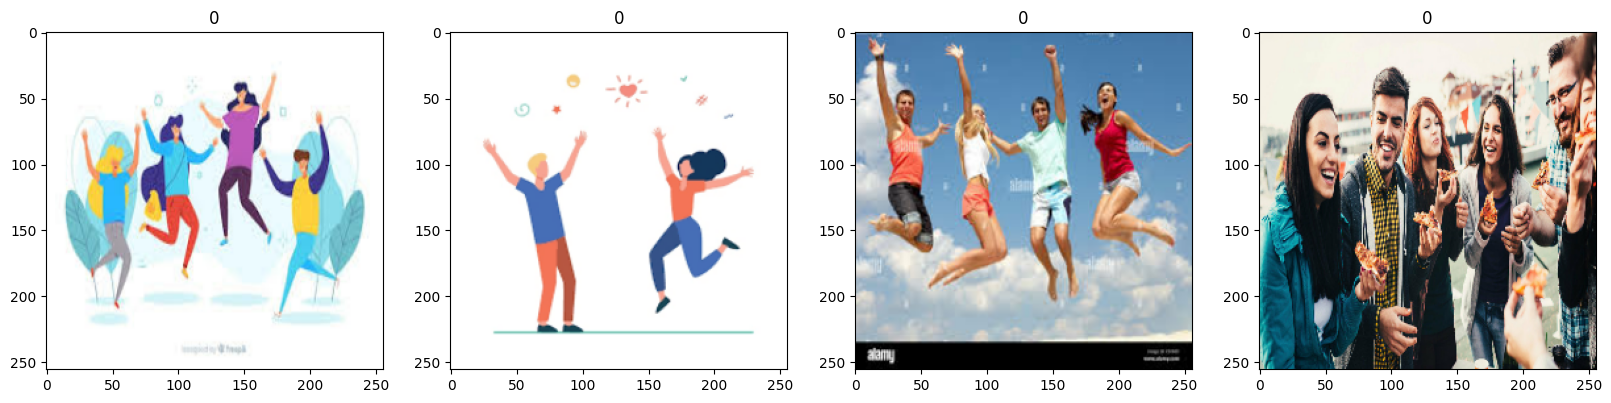

In [193]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [194]:
scaled = batch[0]/255

In [195]:
scaled.max()

1.0

In [196]:
data = data.map(lambda x,y: (x/255, y))

In [197]:
scaled_iterator = data.as_numpy_iterator()

In [198]:
batch = scaled_iterator.next()

In [199]:
batch[0].min()

0.0

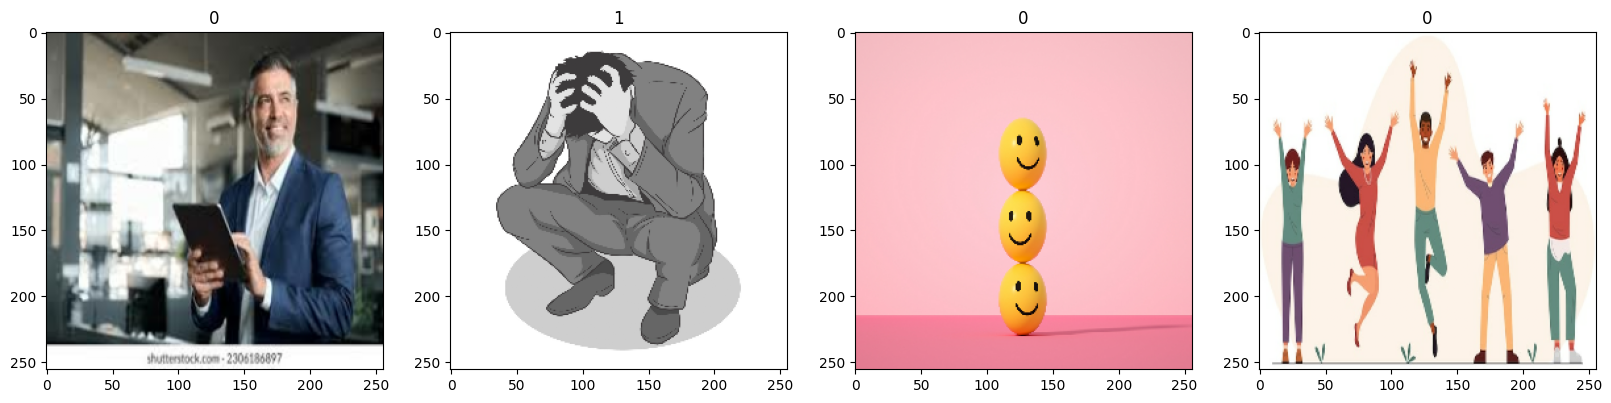

In [200]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [201]:
len(data)

15

In [202]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)

In [203]:
train_size+val_size+test_size

15

In [204]:
train  = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [205]:
len(test)

1

In [206]:
#build deep learning models sec 3#

In [207]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [208]:
model = Sequential()

In [209]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape =(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [210]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [211]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [212]:
logdir='logs'

In [213]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [214]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 191ms/step - accuracy: 0.5367 - loss: 0.9189 - val_accuracy: 0.6953 - val_loss: 0.5724
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 180ms/step - accuracy: 0.7148 - loss: 0.5624 - val_accuracy: 0.7656 - val_loss: 0.3780
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 183ms/step - accuracy: 0.8068 - loss: 0.4644 - val_accuracy: 0.8750 - val_loss: 0.3815
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 166ms/step - accuracy: 0.8755 - loss: 0.3549 - val_accuracy: 0.8828 - val_loss: 0.2853
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 180ms/step - accuracy: 0.8875 - loss: 0.2990 - val_accuracy: 0.9453 - val_loss: 0.2190
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 181ms/step - accuracy: 0.9070 - loss: 0.2525 - val_accuracy: 0.9531 - val_loss: 0.1623
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 183ms/step - accuracy: 0.9595 - loss: 0.1562 - val_accuracy: 0.9844 - val_loss: 0.1144
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 182ms/step - accuracy: 0.9472 - loss: 0.1832 - val_accuracy: 0.

In [215]:
hist.history

{'accuracy': [0.590624988079071,
  0.7281249761581421,
  0.8218749761581421,
  0.8687499761581421,
  0.8843749761581421,
  0.918749988079071,
  0.9437500238418579,
  0.9468749761581421,
  0.981249988079071,
  0.96875,
  0.984375,
  0.9937499761581421,
  0.9937499761581421,
  0.987500011920929,
  0.984375,
  0.9906250238418579,
  0.9937499761581421,
  0.9906250238418579,
  0.9937499761581421,
  0.9906250238418579],
 'loss': [0.7929725646972656,
  0.5248444080352783,
  0.43273454904556274,
  0.3294919431209564,
  0.2816390097141266,
  0.23612728714942932,
  0.1711101531982422,
  0.19705723226070404,
  0.13305404782295227,
  0.08127905428409576,
  0.05582601577043533,
  0.043863289058208466,
  0.04157395660877228,
  0.05914076417684555,
  0.04306773096323013,
  0.03159622102975845,
  0.022103765979409218,
  0.03068217635154724,
  0.024143222719430923,
  0.04048096388578415],
 'val_accuracy': [0.6953125,
  0.765625,
  0.875,
  0.8828125,
  0.9453125,
  0.953125,
  0.984375,
  0.9765625,
  

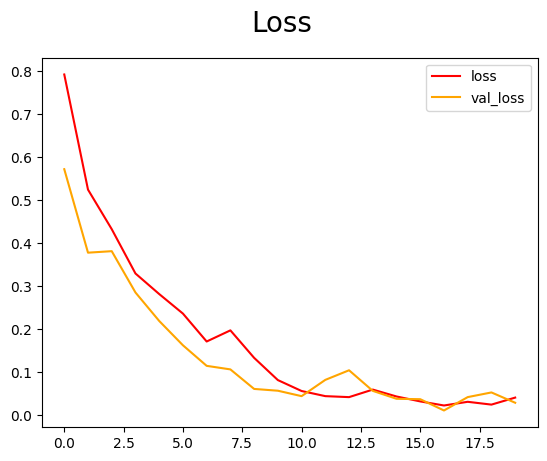

In [216]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='red', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper right")
plt.show()

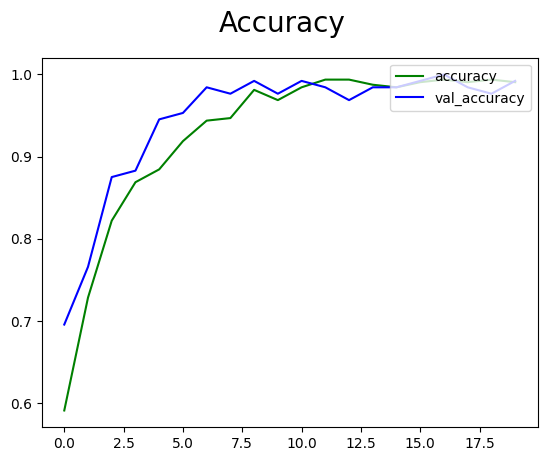

In [217]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='green', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='blue', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper right")
plt.show()

In [218]:
#sec 4 testing#

In [219]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [220]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [221]:
len(test)

1

In [222]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


In [223]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:0.75, Accuracy:0.875


In [224]:
#test#

In [225]:
import cv2

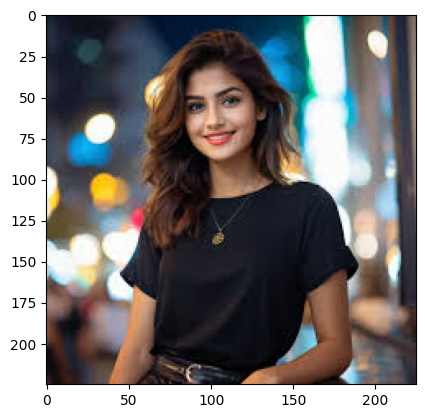

In [226]:
image_path = 'Documents/testhappy.jpg'
img = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

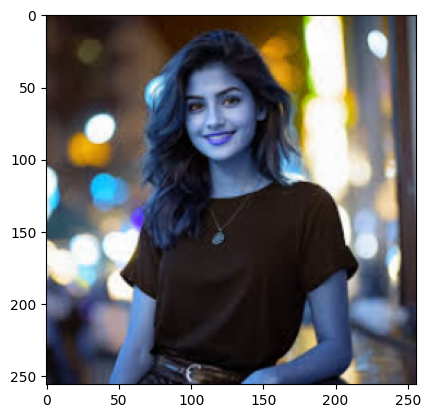

In [227]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [228]:
resize.shape

TensorShape([256, 256, 3])

In [229]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [230]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


In [231]:
yhat

array([[0.1970011]], dtype=float32)

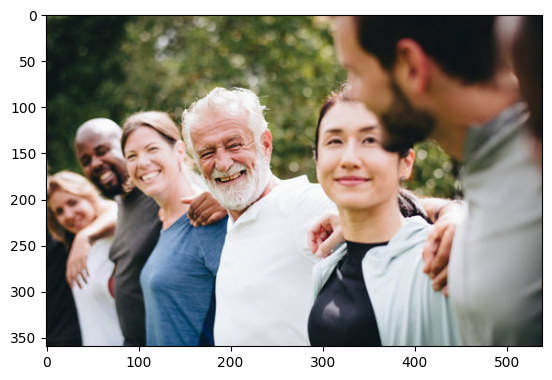

In [256]:
image_path = 'data overall/data (DL)/360_F_237330799_fynB7PDF8qXuq2qYTEKOa6E0Lt8Vbzv6.jpg'
img = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

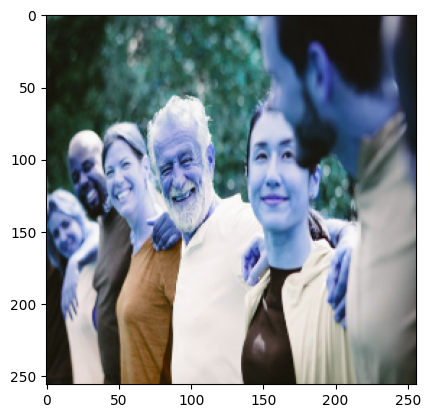

In [257]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [258]:
resize.shape

TensorShape([256, 256, 3])

In [259]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [260]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [261]:
yhat

array([[6.1047963e-06]], dtype=float32)

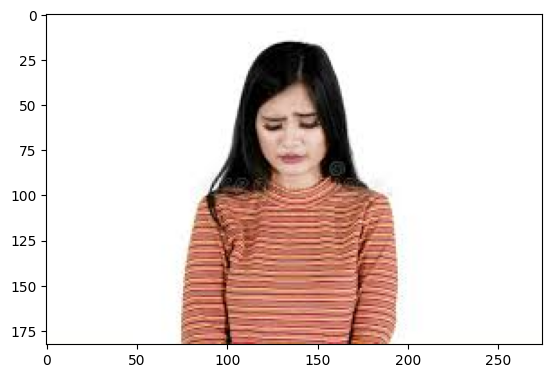

In [238]:
image_path = 'Documents/testsad.jpg'
img = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

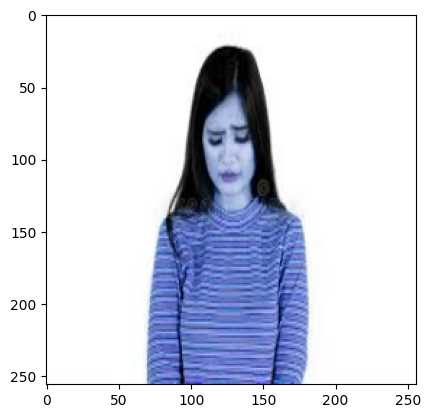

In [239]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [240]:
resize.shape

TensorShape([256, 256, 3])

In [241]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [242]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [243]:
yhat

array([[0.9349306]], dtype=float32)

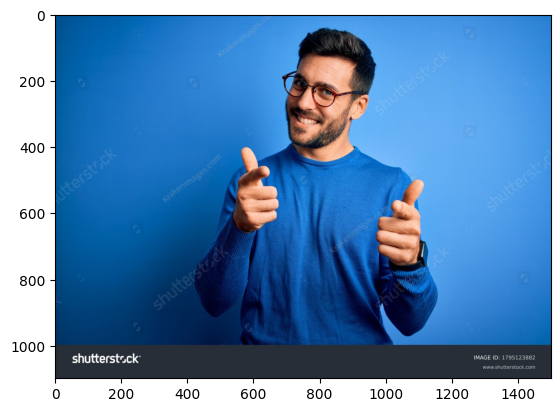

In [244]:
image_path = 'Documents/bluehappy.jpg'
img = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

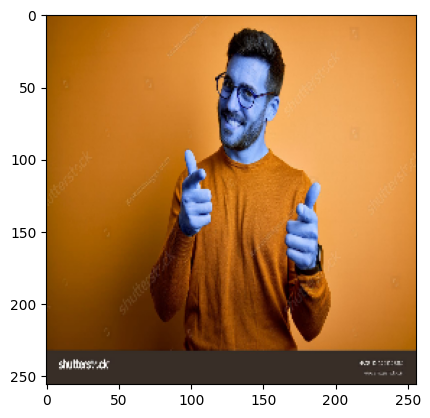

In [245]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [246]:
resize.shape

TensorShape([256, 256, 3])

In [247]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [248]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [249]:
yhat

array([[0.05671439]], dtype=float32)

In [250]:
if yhat > 0.5:
    print(f'Predicted class is Happy')
else:
    print(f'Predicted class is Sad')

Predicted class is Sad


In [251]:
from tensorflow.keras.models import load_model

In [252]:
model.save(os.path.join('Documents', 'happysadmodel.keras'))

In [253]:
# Load the model
new_model = load_model(os.path.join('Documents', 'happysadmodel.keras'))

In [254]:
yhatnew = new_model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


In [262]:
if yhat > 0.5:
    print(f'Predicted class is Happy')
else:
    print(f'Predicted class is Sad')

Predicted class is Sad


In [ ]:
from flask import Flask, request, jsonify
from keras.models import load_model
import numpy as np

app = Flask(__name__)
model = load_model('Documents/happysadmodel.h5')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json  # Get data posted as a json
    prediction = model.predict(np.array([data['input']]))
    return jsonify({'prediction': prediction.tolist()})

if __name__ == '__main__':
    app.run(debug=True)
